Null Values per Column:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Number of Duplicate Rows: 0

Unique Product Categories: ['Books' 'Electronics' 'Home Decor' 'Clothing']


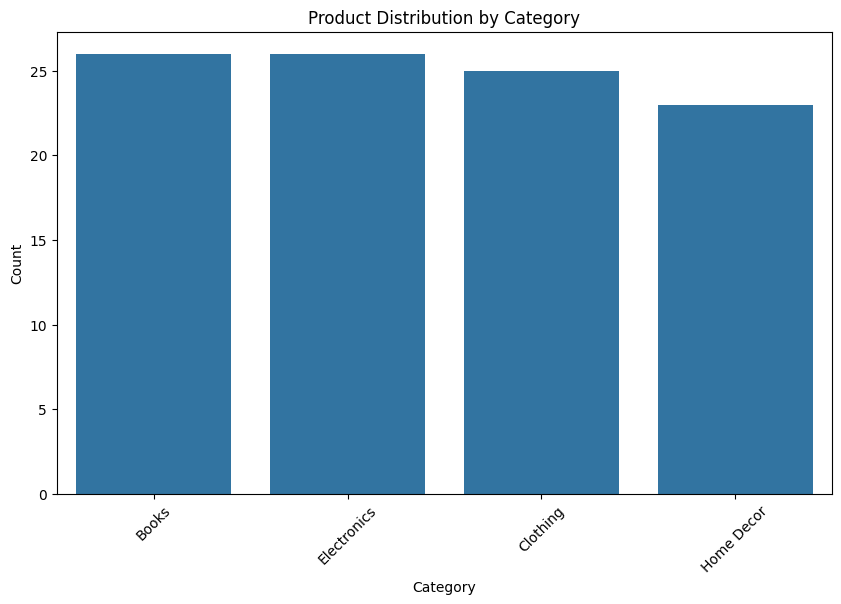


Top 10 Most Expensive Products:
                 ProductName   Price
74          TechPro Textbook  497.76
31        BookWorld Cookbook  488.63
44         SoundWave T-Shirt  481.78
16       ActiveWear Textbook  469.77
36      SoundWave Smartwatch  459.86
40  ComfortLiving Smartphone  456.28
82     ActiveWear Smartwatch  455.72
22   ActiveWear Cookware Set  454.53
63   HomeSense Running Shoes  452.42
93    HomeSense Cookware Set  447.34

Average Price per Category:
Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


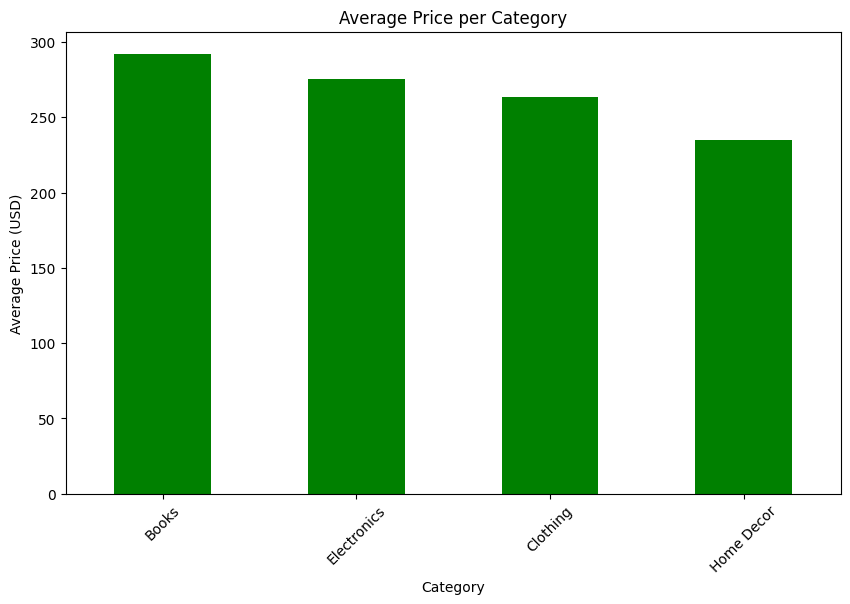

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset of products
file_path = "D:/zeotap/Products - Products.csv"  
df = pd.read_csv(file_path)

# Check for Null Values and duplicate values
print("Null Values per Column:")
print(df.isnull().sum())
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

# data cleaning Process
if df.isnull().sum().any():
    print("\nHandling Missing Values...")
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True) 
        else:
            df[col].fillna(df[col].mean(), inplace=True) 

if df['Price'].dtype != 'float':
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Checkng the Categories in the product list
print("\nUnique Product Categories:", df['Category'].unique())

# Analysis somne datas
# 1. Product Distribution by Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Top 10 Most Expensive Products
top_expensive = df.nlargest(10, 'Price')[['ProductName', 'Price']]
print("\nTop 10 Most Expensive Products:")
print(top_expensive)

# 3. Average Price per Category
avg_price_per_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price per Category:")
print(avg_price_per_category)

# Visualize Average Price per Category
plt.figure(figsize=(10, 6))
avg_price_per_category.plot(kind='bar', color='green')
plt.title("Average Price per Category")
plt.xlabel("Category")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.show()

